In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.stats as stat
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [335]:
df = pd.read_csv('cleaned_failur_outliers_diabetes_data.csv')

In [336]:
a=df['Insulin'].unique()
a.sort()
print(a)
df[df['Insulin']>200].shape

[  0  14  15  16  18  22  23  25  29  32  36  37  38  40  41  42  43  44
  45  46  48  49  50  51  52  53  54  55  56  57  58  59  60  61  63  64
  65  66  67  68  70  71  72  73  74  75  76  77  78  79  81  82  83  84
  85  86  87  88  89  90  91  92  94  95  96  99 100 105 106 108 110 112
 114 115 116 119 120 122 125 126 127 128 129 130 132 135 140 142 144 145
 146 148 150 152 155 156 158 159 160 165 166 167 168 170 171 175 176 178
 180 182 183 184 185 188 190 191 192 193 194 196 200 204 205 207 210 215
 220 225 228 230 231 235 237 240 245 249 250 255 258 265 270 271 272 274
 275 277 278 280 284 285 291 293 300 304 310 318 321 325 326 328 330 335
 342 360 370 375 387 392 402 415 440 465 474 478 480 485 495 510 540 543
 545 579 600 680 744 846]


(85, 9)

In [337]:
df.shape

(768, 9)

In [338]:
dt = df[df['Insulin']==0]
ind = df.index[df['Insulin']==0].tolist()
df = df.drop(index=ind,axis=0) 

<Axes: >

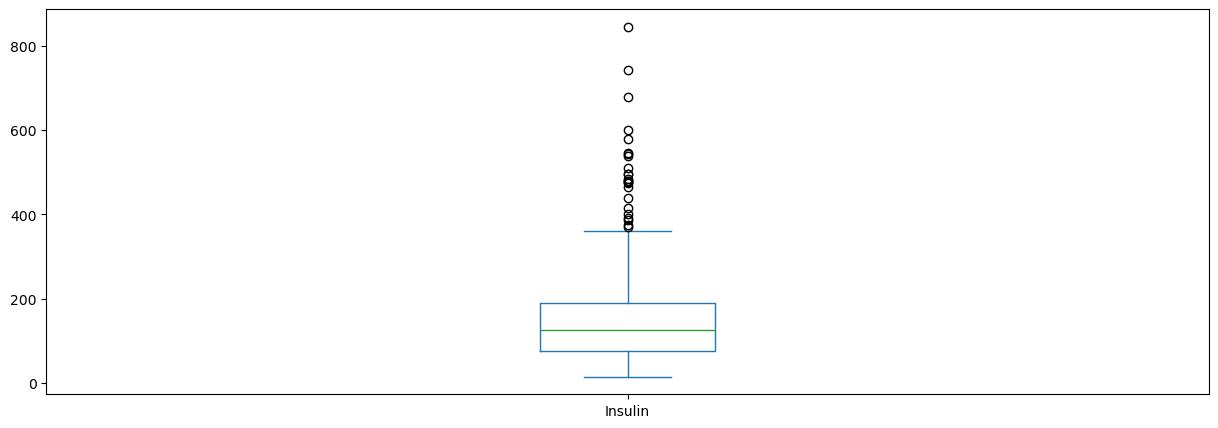

In [339]:
df['Insulin'].plot.box(figsize=(15,5))

In [294]:
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,50,0,0,35.3,0.134,29,0


In [295]:
df.shape

(394, 4)

In [296]:
df.shape

(394, 9)

In [297]:
df.duplicated().sum()

0

In [298]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [299]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,50,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [300]:
cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age','Outcome','Insulin']

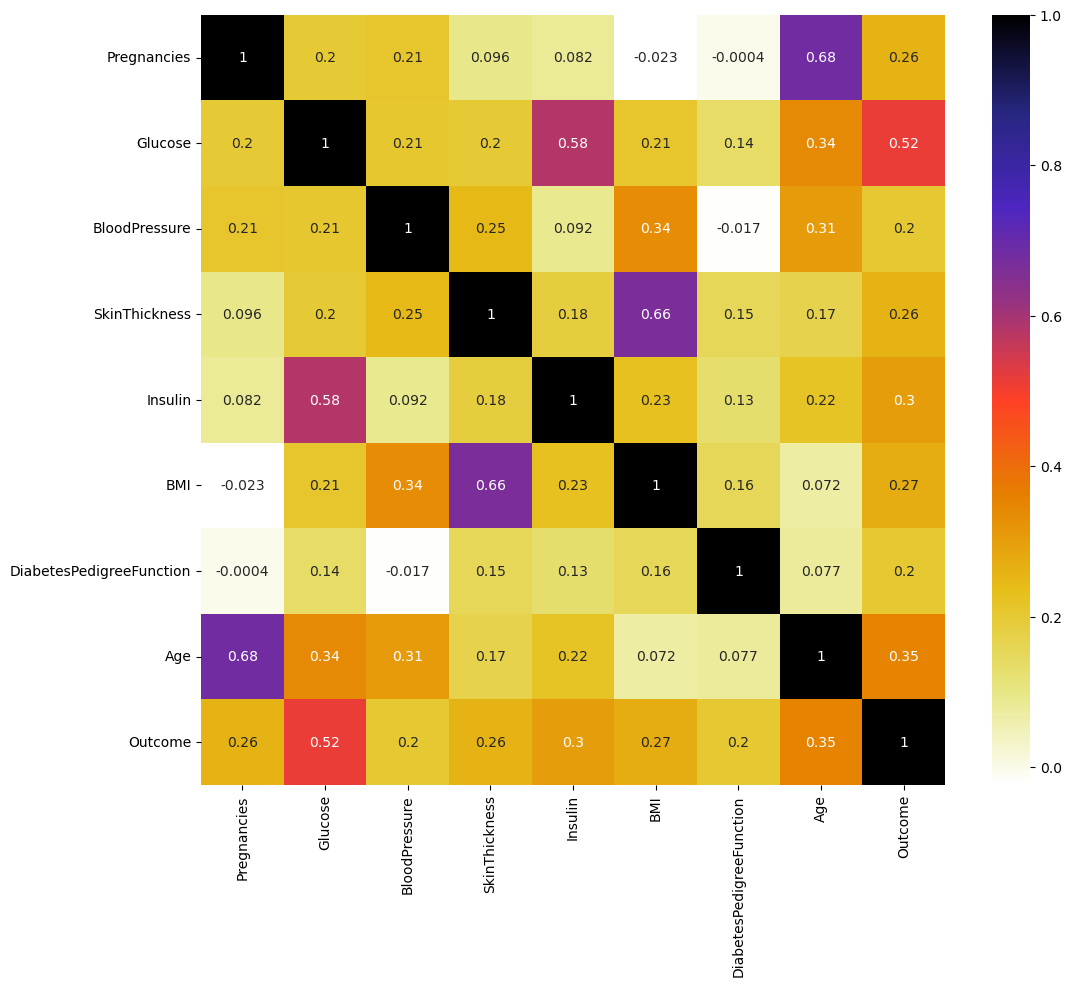

In [301]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot = True,cmap=plt.cm.CMRmap_r)
plt.show()

In [302]:
d =dt.copy()

In [303]:
col1 = ['Pregnancies','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Outcome']
for i in col1:
    df=df.drop(i,axis=1)
for i in col1:
    dt=dt.drop(i,axis=1)

In [304]:
cols=['Glucose','BMI','Age','Insulin']

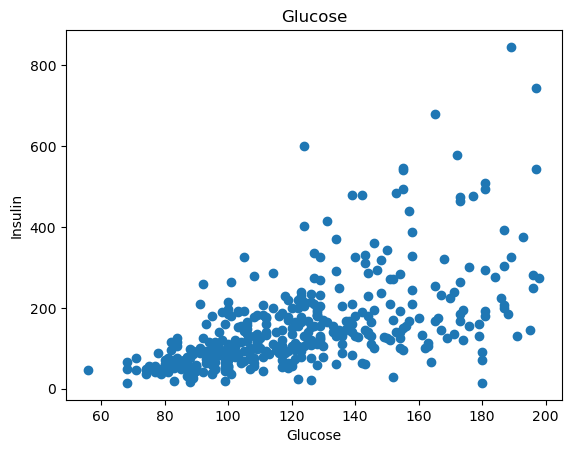

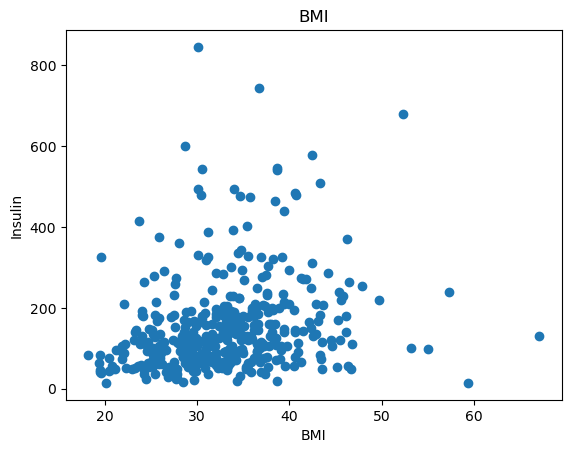

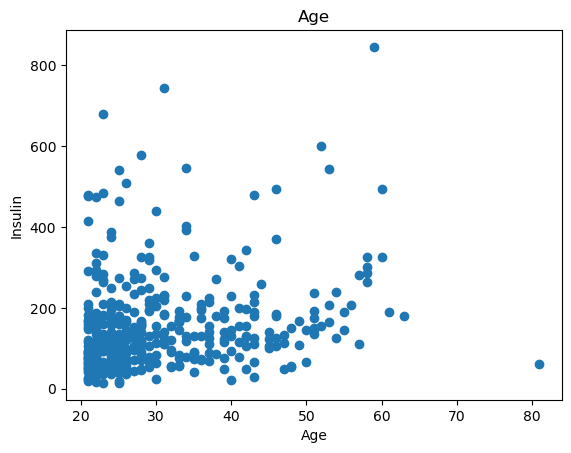

In [305]:
for label in cols[:-1]:
    plt.scatter(df[label],df['Insulin'])
    plt.title(label)
    plt.ylabel('Insulin')
    plt.xlabel(label)
    plt.show()

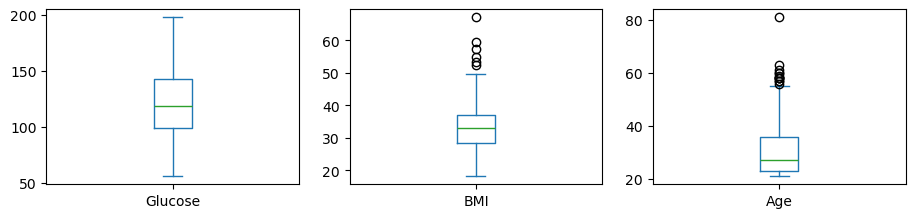

In [306]:
for i in range(1,4):
    plt.subplot(2, 4, i)
    df[cols[i-1]].plot.box(figsize=(15,5))

In [307]:
def find_outlier(cols,data):#outlier 
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers_list = data[(data[cols] < lower_bound) | (data[cols] > upper_bound)][cols].unique().tolist()

    # Print results
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Outliers:\n{outliers_list}")
    return outliers_list


In [308]:
def clean_outlier(col,outlier,df,MMM ):
    for i in outlier :
        ind =df.index[df[col]==i].tolist()
        df.iloc[ind, df.columns.get_loc(col)] = MMM
    return df


In [309]:
data = df.copy()

In [310]:
# Reset the index of the dataframe
df.reset_index(drop=True, inplace=True)
a = find_outlier('Age', df)
df = clean_outlier('Age', a, df, 55)

Lower Bound: 3.5
Upper Bound: 55.5
Outliers:
[59, 57, 56, 58, 60, 61, 81, 63]


<Axes: >

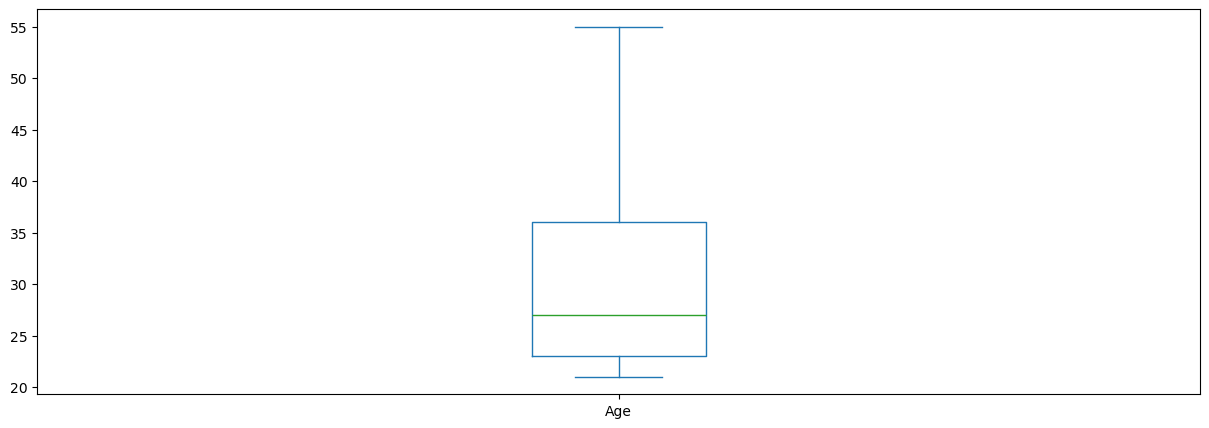

In [311]:
df['Age'].plot.box(figsize=(15,5))

In [312]:
def scale(df,oversample=False):
    x = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)
    data = np.hstack([x,np.reshape(y,(-1,1))])
    return data , x, y

In [313]:
train,test = train_test_split(df,test_size=0.2,random_state=99)

In [314]:
train,x_train,y_train = scale(train,True)
test,x_test,y_test = scale(test,False)

# Randomforest

In [315]:
rnf = RandomForestRegressor(n_estimators=100,random_state=99)
rnf.fit(x_train,y_train)
y_pred = rnf.predict(x_test)

In [316]:
# Print the classification report
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


Mean Squared Error: 89.38544556962026


# optimize

In [317]:

rf = RandomForestRegressor()

# Step 2: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Replace 'auto' with valid options
}
# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    error_score='raise'  # Force raising errors
)

# Step 4: Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Step 5: Get the best parameters and evaluate the model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(x_test)

# Step 6: Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Mean Squared Error (MSE): 79.5894835443038


c:\Users\ASUS TUF\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [318]:
dt,x,y = scale(dt,False)

In [319]:
insulin_pre = best_model.predict(x)

In [320]:
insulin_pre

array([45.3 , 34.02, 41.04, 30.56, 32.38, 33.08, 29.96, 37.24, 32.22,
       38.44, 30.22, 29.82, 34.2 , 33.32, 39.26, 33.32, 30.54, 29.5 ,
       31.78, 36.58, 35.12, 27.64, 33.64, 30.2 , 42.4 , 35.66, 43.12,
       35.62, 30.38, 30.86, 26.14, 36.74, 36.14, 33.88, 32.06, 32.44,
       38.36, 30.18, 26.74, 33.06, 35.8 , 30.04, 37.74, 29.  , 34.88,
       30.52, 27.16, 35.66, 27.22, 30.9 , 28.8 , 28.78, 28.18, 26.92,
       43.48, 41.48, 39.82, 27.38, 28.18, 26.6 , 31.88, 41.56, 32.  ,
       33.24, 37.84, 29.62, 30.36, 28.56, 32.22, 31.58, 27.26, 33.14,
       31.28, 29.52, 29.88, 36.62, 37.6 , 47.4 , 33.92, 30.76, 30.14,
       29.9 , 41.94, 38.46, 35.02, 42.38, 33.86, 32.2 , 36.92, 35.54,
       36.26, 33.76, 33.34, 26.76, 33.5 , 34.5 , 35.5 , 26.52, 40.34,
       30.9 , 25.72, 27.42, 32.22, 36.56, 30.42, 24.48, 39.1 , 37.58,
       35.  , 36.52, 39.32, 35.62, 29.46, 40.36, 30.82, 35.36, 39.98,
       36.78, 33.62, 39.78, 36.7 , 45.94, 32.4 , 37.26, 35.72, 39.72,
       34.58, 31.74,

In [ ]:
min(insulin_pre)

# Linear Regression

In [321]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

In [322]:
# Print the classification report
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 114.90128666448231


# Optimize

In [323]:
from sklearn.linear_model import Lasso

# Step 1: Define the Ridge Regression model
ridge = Lasso()

# Step 2: Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # Optimize for MSE
                           verbose=2,
                           n_jobs=-1)  # Use all processors

# Step 4: Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Step 5: Get the best parameters and evaluate the model
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(x_test)

# Step 6: Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mean Squared Error (MSE): 114.93543346323607


# SVMs = Surport Vector machine 

In [324]:
train,test = train_test_split(data,test_size=0.2,random_state=99)

In [325]:
train,x_train,y_train = scale(train,True)
test,x_test,y_test = scale(test,False)

In [326]:
from sklearn.svm import SVR


# Step 2: Define the SVR model
svr = SVR()

# Step 3: Set up the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # Types of kernels
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5],          # Epsilon margin
    'gamma': ['scale', 'auto']           # Kernel coefficient
}

# Step 4: Perform GridSearchCV
grid_search = GridSearchCV(estimator=svr,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # Optimize for MSE
                           verbose=2,
                           n_jobs=-1)  # Use all processors

grid_search.fit(x_train, y_train)

# Step 5: Evaluate the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(x_test)

# Step 6: Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)


print(f"Mean Squared Error (MSE): {mse}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mean Squared Error (MSE): 194.84853029761587
